In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# download table of drug resistance mutations
# https://github.com/hivdb/hivfacts/blob/main/data/drms_hiv1.csv

In [25]:
%%bash
wget https://raw.githubusercontent.com/hivdb/hivfacts/main/data/drms_hiv1.csv

--2024-04-04 10:16:27--  https://raw.githubusercontent.com/hivdb/hivfacts/main/data/drms_hiv1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3655 (3.6K) [text/plain]
Saving to: ‘drms_hiv1.csv.1’

     0K ...                                                   100% 34.2M=0s

2024-04-04 10:16:27 (34.2 MB/s) - ‘drms_hiv1.csv.1’ saved [3655/3655]



In [26]:
df_drms_hiv1 = pd.read_csv("drms_hiv1.csv")
df_drms_hiv1['position'] = df_drms_hiv1['position'].astype(int)

CA_positions = list(df_drms_hiv1[df_drms_hiv1['gene']=='CA']['position'])
PR_positions = list(df_drms_hiv1[df_drms_hiv1['gene']=='PR']['position'])
RT_positions = list(df_drms_hiv1[df_drms_hiv1['gene']=='RT']['position'])
IN_positions = list(df_drms_hiv1[df_drms_hiv1['gene']=='IN']['position'])

In [27]:
df = pd.read_csv("../../results/all_mutations.annotated.csv")
df['n_reads_var'] = df['Rvar'] + df['Fvar']
df['coverage'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_reads_var'] / df['coverage']
df["gene"].unique()
df['aa_position'] = df['aa_position'].apply(lambda x: np.nan if x=="error" else int(x))

In [28]:
df = df[['patient', 'time', 'Pos', 'Ref', 'Var', 'frequency',
         'AltAA_f1', 'RefAA_f1', 'f1_IsSynonymous',
         'AltAA_f2', 'RefAA_f2', 'f2_IsSynonymous',
         'AltAA_f3', 'RefAA_f3', 'f3_IsSynonymous',
          'gene', 'aa_position']]

df['time'] = df['time'].str.split('_').str[1]

In [29]:
df['gene'].unique()

array(['error', 'CA', 'PR', 'RT', 'IN'], dtype=object)

In [30]:
df['time'].unique()

array(['254', '216', '10', '273', '60', '31', '112', '87', '165', '138',
       '242', '282', '190', '218', '7', '30', '321', '358', '54', '80',
       '240', '213', '191', '161', '135', '28', '9'], dtype=object)

In [31]:
# exclude CA_positions for now
df_res_CA = df[((df['gene']=='CA') & (df["aa_position"].isin(CA_positions)))]
df_res_CA = pd.merge(df_res_CA, df_drms_hiv1[df_drms_hiv1['gene']=='CA'], left_on="aa_position", right_on="position")

df_res_PR = df[((df['gene']=='PR') & (df["aa_position"].isin(PR_positions)))]
df_res_PR = pd.merge(df_res_PR, df_drms_hiv1[df_drms_hiv1['gene']=='PR'], left_on="aa_position", right_on="position")
# PR corresponding to frame3 in our dataframe annotations

df_res_RT = df[((df['gene']=='RT') & (df["aa_position"].isin(RT_positions)))]
df_res_RT = pd.merge(df_res_RT, df_drms_hiv1[df_drms_hiv1['gene']=='RT'], left_on="aa_position", right_on="position")
# RT corresponding to frame3 in our dataframe annotations

df_res_IN = df[((df['gene']=='IN') & (df["aa_position"].isin(IN_positions)))]
df_res_IN = pd.merge(df_res_IN, df_drms_hiv1[df_drms_hiv1['gene']=='IN'], left_on="aa_position", right_on="position")
# IN corresponding to frame3 in our dataframe annotations
# however postion 232 has the wrong reference somehow 


df_res = pd.concat([df_res_PR, df_res_RT, df_res_IN, df_res_CA])

df_res = df_res[['patient', 'time', 'Pos', 'Ref', 'Var', 'frequency',
       'AltAA_f3', 'RefAA_f3', 'f3_IsSynonymous', 'gene_x', 'aa_position',
       'drug_class', 'gene_y', 'position', 'aa']]

In [32]:
df_res = df_res[df_res['f3_IsSynonymous']==0]

In [33]:
df_res['patient'].unique()

array(['CAP206', 'CAP217', 'CAP257', 'CAP287'], dtype=object)

In [34]:
# load coverage 

df_coverage = pd.read_csv("../../results/all_coverage.csv")
df_coverage['patient'] = df_coverage['sample'].str.split('/').str[0]
df_coverage['time'] = df_coverage['sample'].str.split('/').str[1].str.split('_').str[1].astype(int)

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_36740/2574115072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['mutation_label'] = df_plot['gene_x']+'-'+df_plot['RefAA_f3']+'>'+df_plot['AltAA_f3']+df_plot['position'].astype(str)
/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_36740/2574115072.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append({'mutation_label': mutation_label,
/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_36740/2574115072.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plo

[4668]


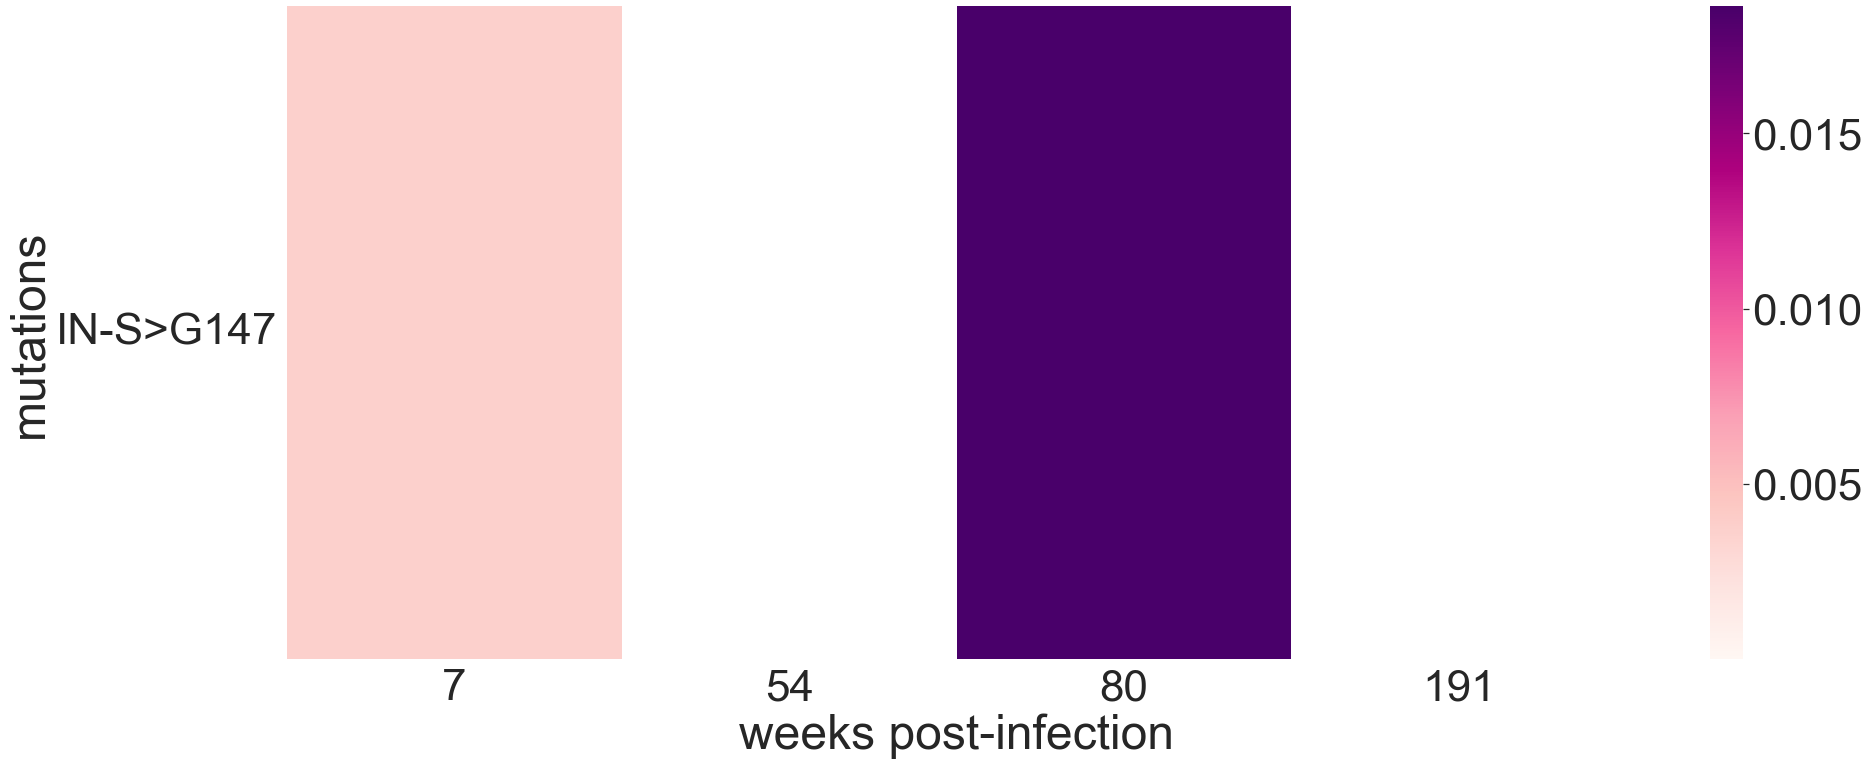

In [122]:
patient_id = 'CAP257'

df_coverage = df_coverage[df_coverage['patient']==patient_id]
df_plot = df_res[df_res['patient']==patient_id]
df_plot['mutation_label'] = df_plot['gene_x']+'-'+df_plot['RefAA_f3']+'>'+df_plot['AltAA_f3']+df_plot['position'].astype(str)

times = df_plot['time'].astype(int).unique()


mutattion_label_of_interest = [
                              #'IN-T>A97', # this mutations don't show up with coverage threshold of 500
                               'IN-S>G147', 
                               #'IN-V>A151', 
                               #'RT-A>V62', 
                               #'RT-A>T62', 
                               #'RT-F>V227'
                              ]

df_plot = df_plot[df_plot['mutation_label'].isin(mutattion_label_of_interest)]


orders = df_plot.sort_values(['gene_x', 'position'])['mutation_label'].unique()
df_plot['time'] = df_plot['time'].astype(int)
df_plot = df_plot.sort_values(['time'])

print(df_plot['Pos'].unique())

df_plot = df_plot.pivot_table(index=['mutation_label', 'Pos'], 
                        values='frequency',
                        columns='time',
                        aggfunc='mean',
                        fill_value=0,
                       ).reset_index()

df_plot = pd.melt(df_plot, 
               id_vars=['mutation_label', 'Pos'], 
               var_name='time', 
               value_name='frequency')

# add rows for each time 
for time in times: 
    for mutation_label in df_plot['mutation_label'].unique():
        position = df_plot[df_plot['mutation_label']==mutation_label]['Pos'].unique()[0]
        
        if not time in df_plot[df_plot['mutation_label']==mutation_label]['time'].unique():
            df_plot = df_plot.append({'mutation_label': mutation_label, 
                             'Pos': position, 
                            'time': time,
                             'frequency': 0},
                          ignore_index=True) 
            
df_plot = pd.merge(df_plot, df_coverage[['pos', 'time', 'coverage']], 
                left_on = ['time', 'Pos'], 
                right_on= ['time', 'pos'])

df_plot.loc[df_plot['coverage']<500, 'frequency'] = np.nan


df_plot = df_plot.pivot_table(index='mutation_label', 
                        values='frequency',
                        columns='time',
                        aggfunc='mean',
                       ).reindex(index=orders)


fig = plt.figure(figsize = (30, 12))
sns.set(font_scale=4)

import matplotlib as mpl
cmap = mpl.cm.get_cmap("RdPu").copy()
cmap.set_under(color='white')

ax = fig.add_subplot(111)
sns.heatmap(df_plot,
            cmap=cmap,
            vmin=0.0000001,
            ax=ax)

ax.tick_params(axis='y', rotation=0)
ax.set_ylabel('mutations')
ax.set_xlabel('weeks post-infection')

fig.savefig('heatmap_application_hiv_drm.svg')

In [116]:
df_plot

time,7,54,80,191
mutation_label,,,,
IN-S>G147,0.003717,0.0,0.018622,0.0


In [126]:
df_coverage[(df_coverage['patient']==patient_id)
            & (df_coverage['time'].isin([7,54,80,191]))
            & (df_coverage['pos'].isin([4668]))]

,Unnamed: 0,pos,coverage,sample,patient,time
140733,4667,4668,538,CAP257/week_7,CAP257,7
179609,4667,4668,4716,CAP257/week_54,CAP257,54
189328,4667,4668,537,CAP257/week_80,CAP257,80
218485,4667,4668,616,CAP257/week_191,CAP257,191
